# **Final Project: Breast Cancer Classification and Model Comparison**

<div align="center">
  <img src="portada.png">
</div>

<div align="center">
  <img src="about.png">
</div>

Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

## Objectives

* `Evaluate` and compare the performance of three distinct deep learning models.

* `Preprocess` and `transform` breast cancer data to optimize its suitability for deep learning model training.

* `Train` and fine-tune the three deep learning models rigorously, utilizing a variety of appropriate techniques and strategies.

* `Assess` the models performance in terms of key metrics such as accuracy, precision, ROC-AUC, and recall, and select the method that best performs tumor classification.

## Set Up

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, fowlkes_mallows_score, recall_score
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')



<div align="center">
  <img src="1.png">
</div>

### License

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

### Data Collection & Processing

<p style="text-align: justify;">
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
</p>


In [159]:
# Loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer()

In [160]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [161]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [162]:
data_frame.shape

(569, 30)

In [163]:
data_frame.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [164]:
data_frame.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

<p style="text-align: justify;">
Each of these categories provides unique information about the properties of the cells.

These data are typical in medical diagnostic problems using machine learning techniques, where they are used to train models that can automatically classify cells into categories of interest, such as benign or malignant. The high dimensionality of the data (many features) and the continuous nature of the features (floating-point values) are common characteristics in this type of problems.
</p>


In [165]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [166]:
# Let's check the columns names
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [167]:
# Looking for missing data
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

The target value of each row is typically set to 0 or 1 to indicate the sample class. This type of problem is known as a binary classification problem, where each sample belongs to one of two classes: benign or malignant.

In the case of the breast cancer dataset, the value 0 is generally used to represent benign tumors (non-cancerous), while the value 1 is used to represent malignant tumors (cancerous).

In [168]:
# Adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [169]:
# Print last 5 rows of the dataframe
data_frame.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [170]:
# Checking the distribution of Target Variable
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

Average value by target

In [171]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [172]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [173]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [174]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


Splitting the data into training data & Testing data

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [176]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


#### Standardize

In this scenario, we opt for employing `StandardScaler` due to the sensitivity of certain activation functions, such as the sigmoidal function, to the scale of input data. Standardization assists in keeping input values within the range where these functions are most responsive, thereby enhancing the model's performance.

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

<div align="center">
  <img src="3.png">
</div>

### Feature correlation matrix

A feature correlation matrix works by calculating the correlation coefficient between each pair of features in a dataset. The correlation coefficient is a statistical measure that indicates the strength and direction of the linear relationship between two variables. There are several methods for calculating the correlation coefficient, with the most common being the Pearson correlation coefficient.

The Pearson correlation coefficient, has a range between -1 and 1. Values close to 1 indicate a strong positive correlation, meaning that the two variables tend to increase together. Values close to -1 indicate a strong negative correlation, meaning that the two variables tend to move in opposite directions. A value of 0 indicates that there is no linear correlation between the two variables.

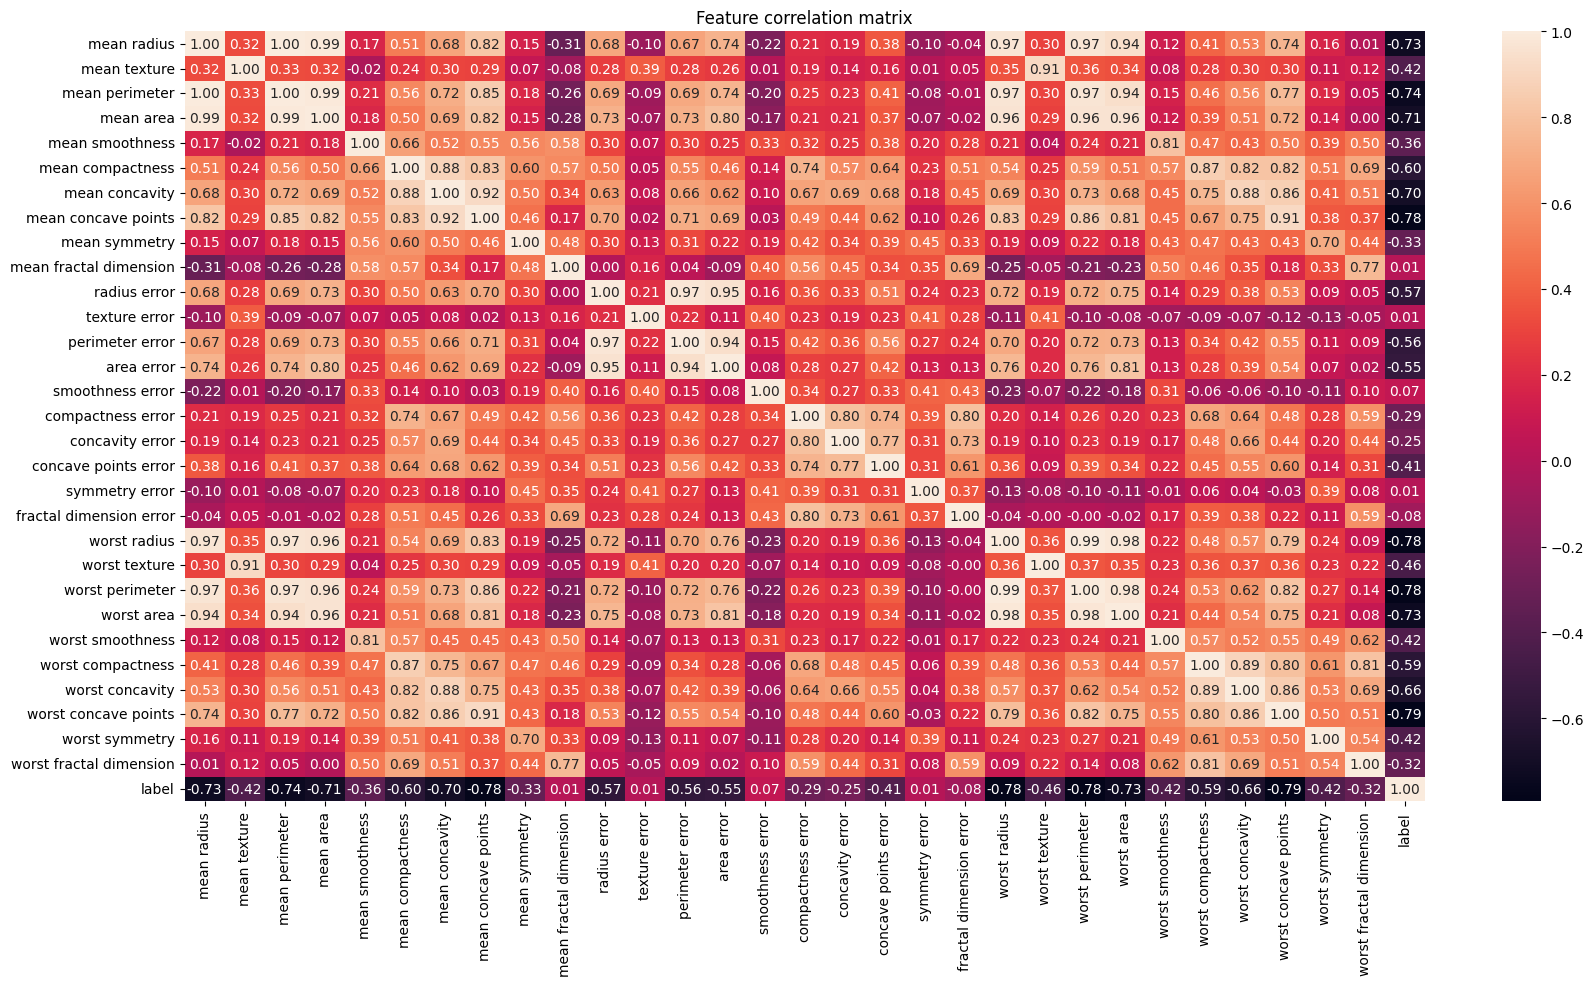

In [201]:
# Let's calculate the feature correlation matrix
correlation_matrix = data_frame.corr()

plt.figure(figsize=(20, 10))
sns.cubehelix_palette(as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

plt.title('Feature correlation matrix')

plt.show()

### Scatterplot Matrix

With this scatter plot, we can observe the data trends, outliers, as well as the relationship between variables, gaining a better understanding of the data structure and patterns.

<Figure size 640x480 with 0 Axes>

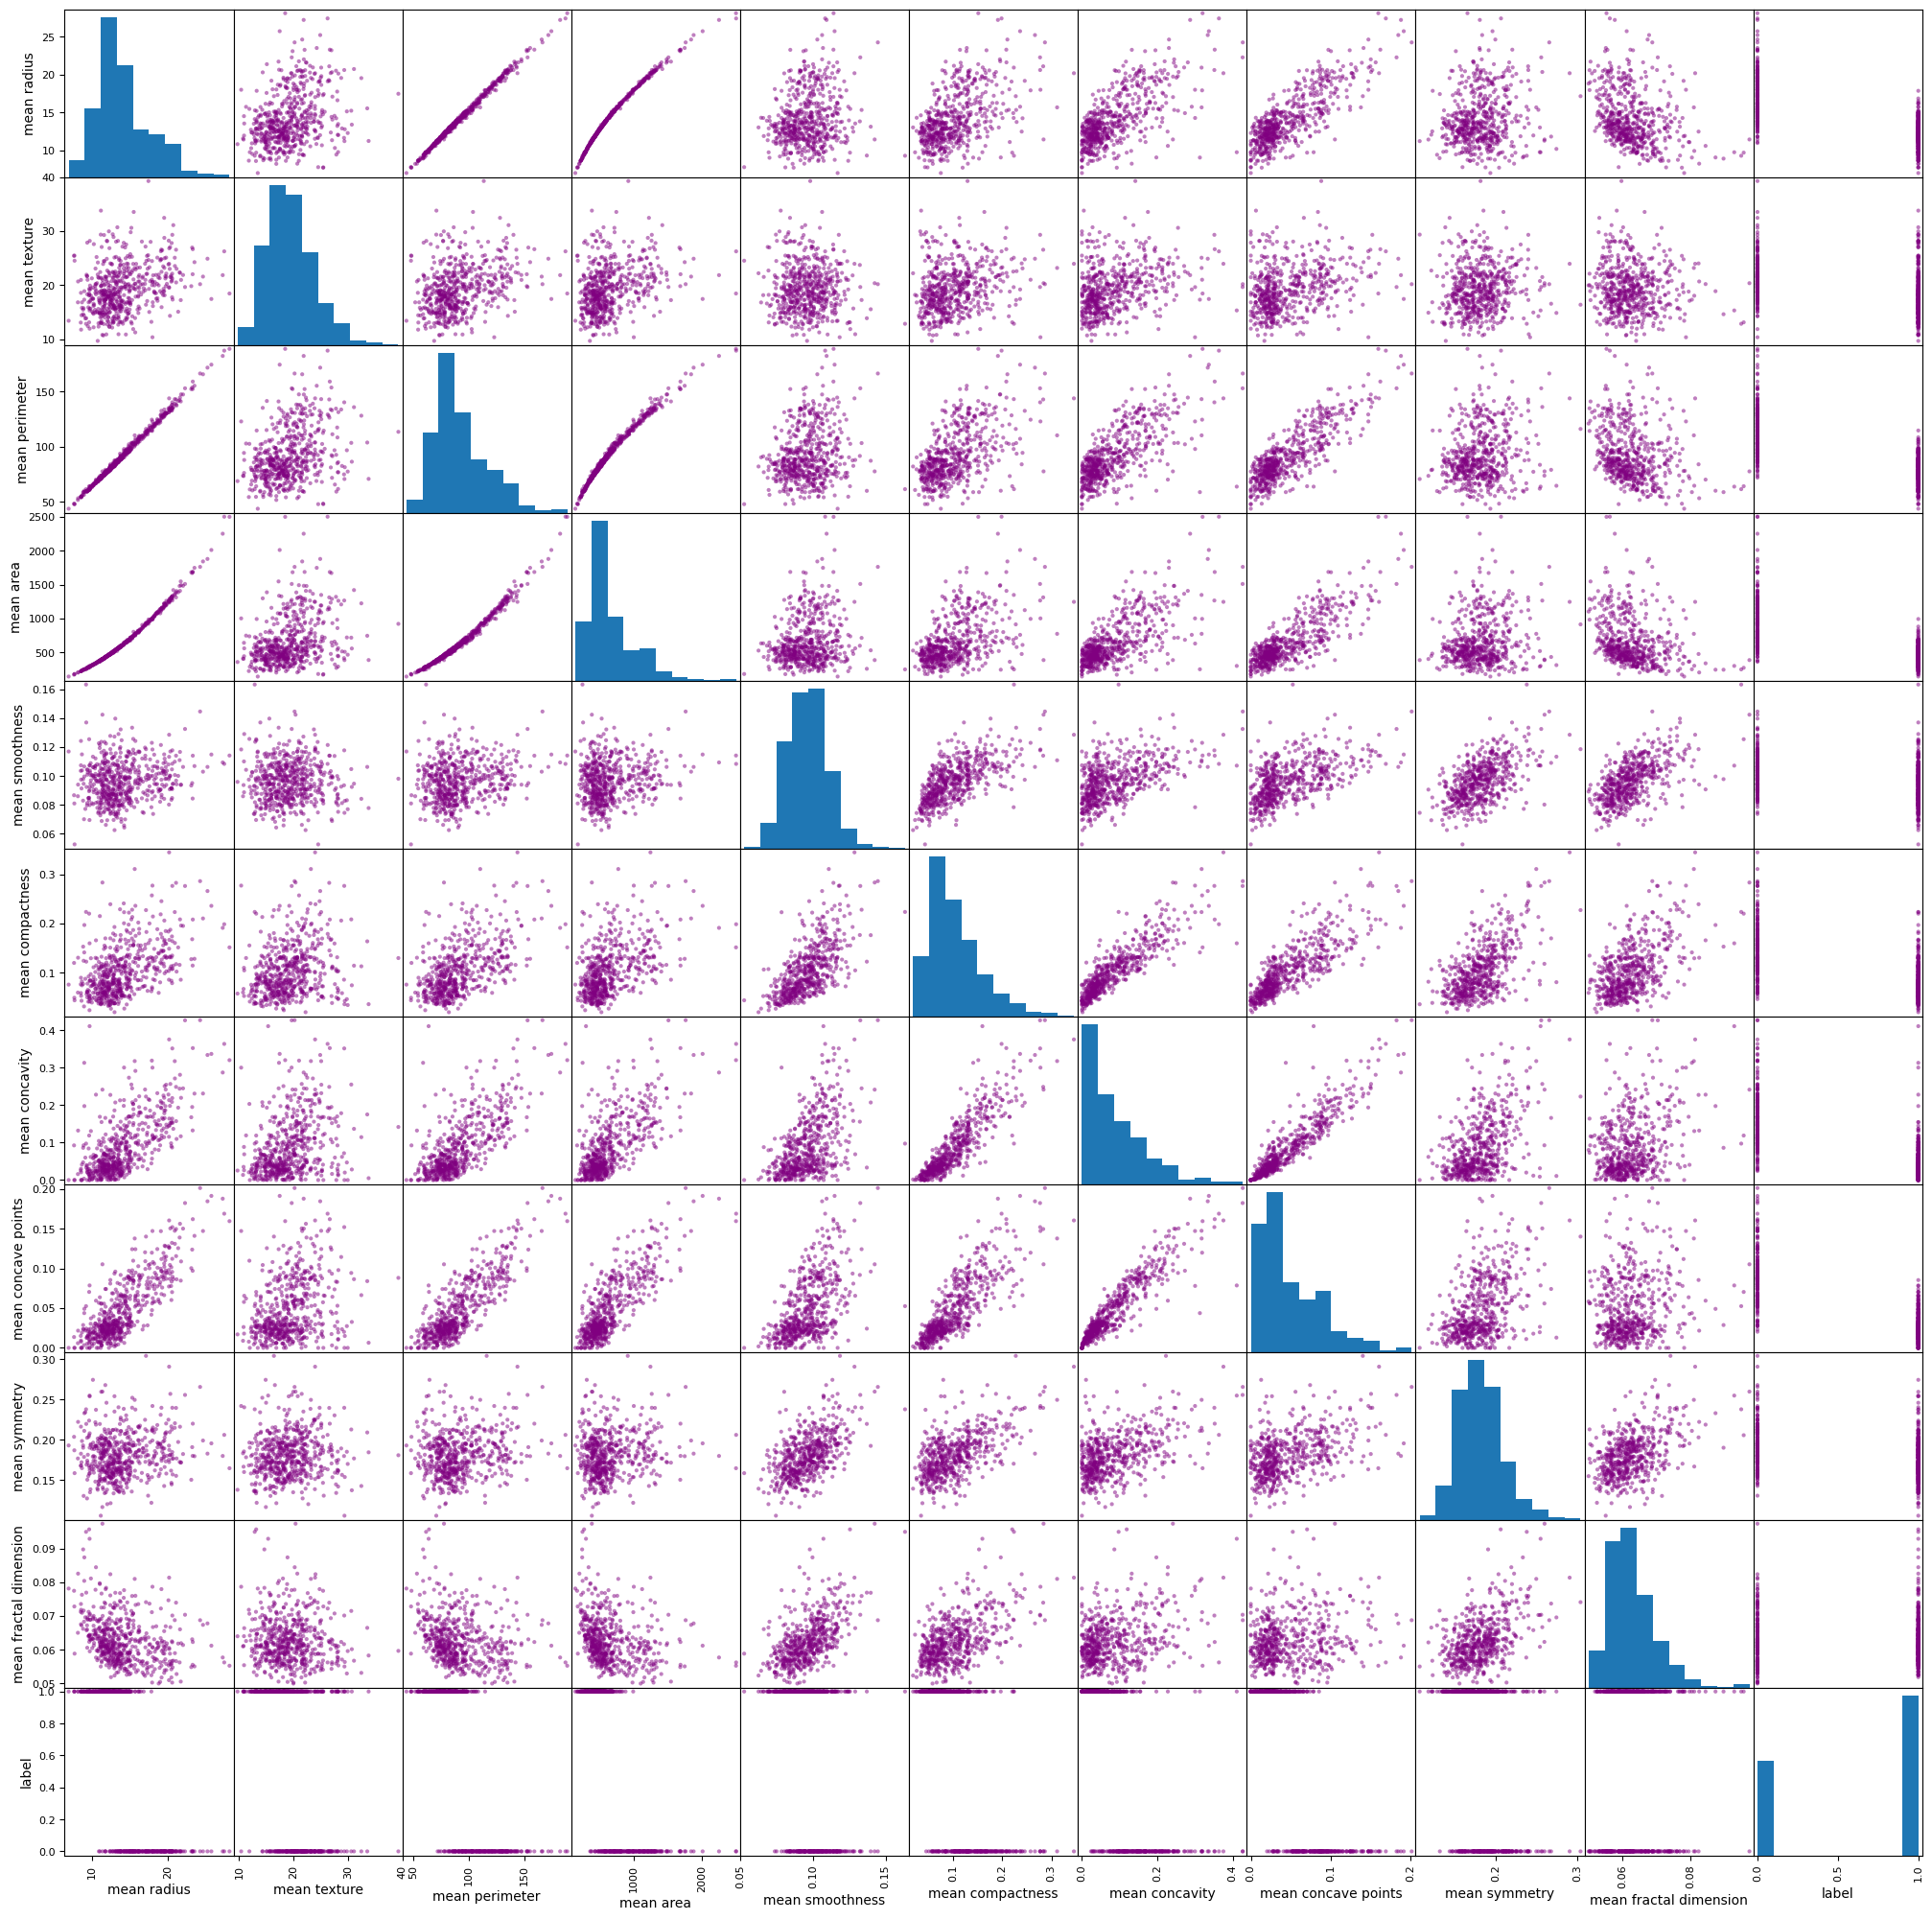

In [206]:
columns_to_drop = ['radius error', 'texture error', 'perimeter error', 'area error',
                   'smoothness error', 'compactness error', 'concavity error',
                   'concave points error', 'symmetry error', 'fractal dimension error',
                   'worst radius', 'worst texture', 'worst perimeter', 'worst area',
                   'worst smoothness', 'worst compactness', 'worst concavity',
                   'worst concave points', 'worst symmetry', 'worst fractal dimension']

new_dataframe = data_frame.drop(columns=columns_to_drop, axis=1)

column_names = new_dataframe.columns

column_positions = {name: idx for idx, name in enumerate(column_names)}

for ax in plt.gcf().get_axes():
    for label in ax.get_yticklabels(): 
        label.set_horizontalalignment('right') 
        column_name = label.get_text()  
        if column_name in column_positions:
            label.set_position((0, column_positions[column_name]))  

plt.show()
scatter_matrix(new_dataframe, figsize=(25, 25), color = 'purple')

plt.show()

The data distribution shows that 62.7% of cases are malignant and 37.3% are benign, we can make several observations:

There is a significant imbalance between the classes of the target variable. The class of malignant tumors is dominant compared to the class of benign tumors.

Class imbalance can influence the training process of the machine learning model. Models tend to be biased towards the dominant class and may struggle to generalize correctly to the minority class.

When evaluating model performance, it is important to take this class imbalance into account. Metrics such as accuracy can be misleading in this context, and it is crucial to consider additional metrics such as sensitivity (recall) and specificity to evaluate the model's performance more comprehensively.

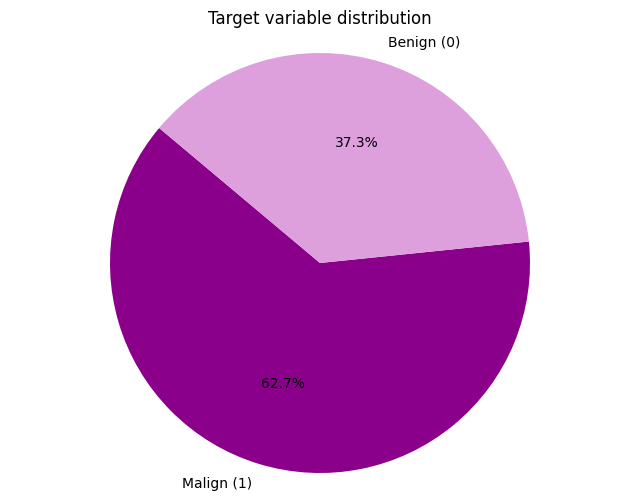

In [207]:
# Pie Chart
labels = ['Malign (1)', 'Benign (0)']
sizes = data_frame['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#8B008B', '#DDA0DD'])

plt.axis('equal') 
plt.title('Target variable distribution')

plt.show()

### SMOTE

This resampling process helps to increase the number of samples in the minority class by generating synthetic samples that resemble existing samples but are located in underrepresented regions of the feature space. This helps improve the model's ability to generalize and properly learn the distribution of the minority class.

In [182]:
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train_std, Y_train)

# Asegurarse de que X_train_smote y Y_train_smote tengan el mismo número de muestras
assert X_train_smote.shape[0] == Y_train_smote.shape[0]

# Luego estandarizar X_train_smote
scaler = StandardScaler()
X_train_smote_std = scaler.fit_transform(X_train_smote)

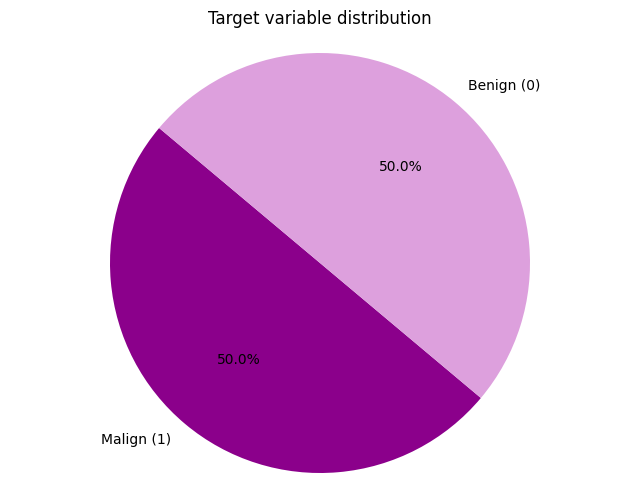

In [208]:
resampled_counts = Y_train_smote.value_counts()

# Pie Chart
labels = ['Malign (1)', 'Benign (0)']
sizes = resampled_counts

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#8B008B', '#DDA0DD'])

plt.axis('equal') 
plt.title('Target variable distribution')

plt.show()

<div align="center">
  <img src="4.png">
</div>

## Building the NN

Keras is a high-level API that simplifies the creation and training of neural network models, while TensorFlow provides the low-level infrastructure to efficiently run these models on hardware such as CPU, GPU, or TPU.

In [184]:
def create_model(activation_function='tanh'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(30,)),
        keras.layers.Dense(20, activation=activation_function,
        kernel_regularizer=tf.keras.regularizers.l1(l=0.01)),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tanh_model = create_model(activation_function='tanh')
LReLU_model = create_model(activation_function='LeakyReLU')
ELU_model = create_model(activation_function='ELU')

The models defined above are `Neural Networks` designed for binary classification problems, in this case, determining wether a tumor is benign or malignant.

Each of the models defines a Neural Network with two dense layers followed by an output layer with a sigmoid activation function, which produces an output between 0 and 1, suitable for binary classification problems.

The input layer (Flatten) is used to flatten the input data so that it can be processed by the dense layers.

In each model, the first dense layer has 20 neurons and uses a specific activation function (tanh, LeakyReLU, or ELU). These activation functions introduce nonlinearities into the network, allowing it to learn complex relationships in the input data.

The second dense layer has 2 neurons, corresponding to the binary output, and uses a sigmoid activation function to produce probabilities of belonging to each class.

Therefore, these models are configured to receive tumor feature data (30 features in total) and produce an output indicating the probability that the tumor is benign or malignant.

## Hyperparameter Optimization

This code performs an exhaustive parameter search, known as "grid search," to tune the hyperparameters of three neural network models using the Keras library. The idea behind grid search is to try all possible combinations of hyperparameter values specified in a grid, and select the combination that yields the best performance according to an evaluation metric, such as accuracy.

In [185]:
# Create KerasClassifier objects
tanh_classifier = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0, activation_function='tanh')
LReLU_classifier = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0, activation_function='LeakyReLU')
ELU_classifier = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0, activation_function='ELU')

# Define the parameter grid
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Create GridSearchCV objects
tanh_grid_search = GridSearchCV(estimator=tanh_classifier, param_grid=param_grid, cv=3)
LReLU_grid_search = GridSearchCV(estimator=LReLU_classifier, param_grid=param_grid, cv=3)
ELU_grid_search = GridSearchCV(estimator=ELU_classifier, param_grid=param_grid, cv=3)

# Fit the GridSearchCV objects to the data
tanh_grid_search_results = tanh_grid_search.fit(X_train_smote_std, Y_train_smote)
LReLU_grid_search_results = LReLU_grid_search.fit(X_train_smote_std, Y_train_smote)
ELU_grid_search_results = ELU_grid_search.fit(X_train_smote_std, Y_train_smote)

# Print best parameters and score for each model
print("Best parameters for tanh model: ", tanh_grid_search_results.best_params_)
print("Best accuracy for tanh model: ", tanh_grid_search_results.best_score_)

print("Best parameters for LeakyReLU model: ", LReLU_grid_search_results.best_params_)
print("Best accuracy for LeakyReLU model: ", LReLU_grid_search_results.best_score_)

print("Best parameters for ELU model: ", ELU_grid_search_results.best_params_)
print("Best accuracy for ELU model: ", ELU_grid_search_results.best_score_)

Best parameters for tanh model:  {'batch_size': 32, 'epochs': 50}
Best accuracy for tanh model:  0.9809027777777777
Best parameters for LeakyReLU model:  {'batch_size': 64, 'epochs': 100}
Best accuracy for LeakyReLU model:  0.9826388888888888
Best parameters for ELU model:  {'batch_size': 32, 'epochs': 100}
Best accuracy for ELU model:  0.9809027777777778


Training the neural network using the optimal parameter grid.

In [193]:
# Tanh model
tanh_model.fit(X_train_smote_std, Y_train_smote, epochs=50, batch_size=32, verbose=0)
tanh_accuracy = tanh_model.evaluate(X_test_std, Y_test)[1]
print("Accuracy for tanh model:", tanh_accuracy)

# LeakyReLU model
LReLU_model.fit(X_train_smote_std, Y_train_smote, epochs=100, batch_size=64, verbose=0)
LReLU_accuracy = LReLU_model.evaluate(X_test_std, Y_test)[1]
print("Accuracy for LeakyReLU model:", LReLU_accuracy)

# ELU model
ELU_model.fit(X_train_smote_std, Y_train_smote, epochs=100, batch_size=32, verbose=0)
ELU_accuracy = ELU_model.evaluate(X_test_std, Y_test)[1]
print("Accuracy for ELU model:", ELU_accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9211
Accuracy for tanh model: 0.9210526347160339
4/4 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9386
Accuracy for LeakyReLU model: 0.9385964870452881
4/4 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9211
Accuracy for ELU model: 0.9210526347160339


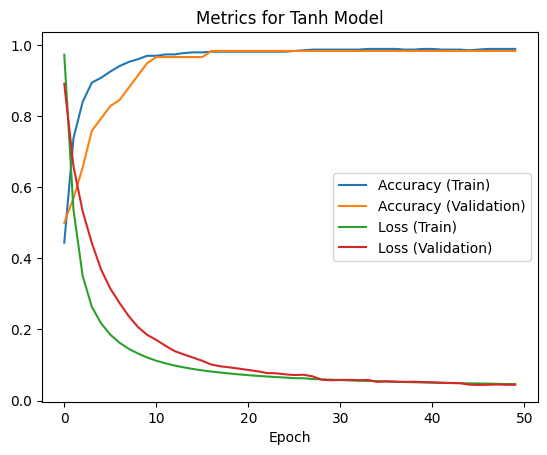

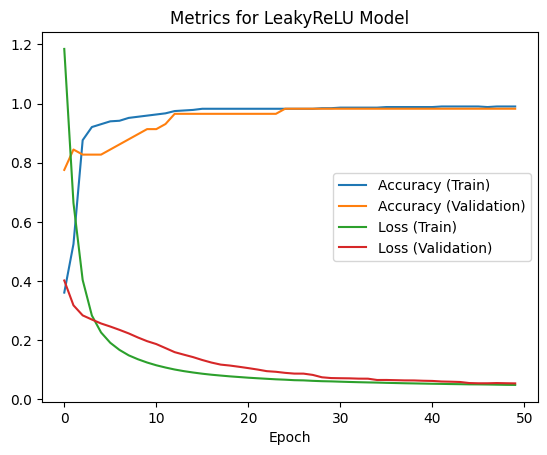

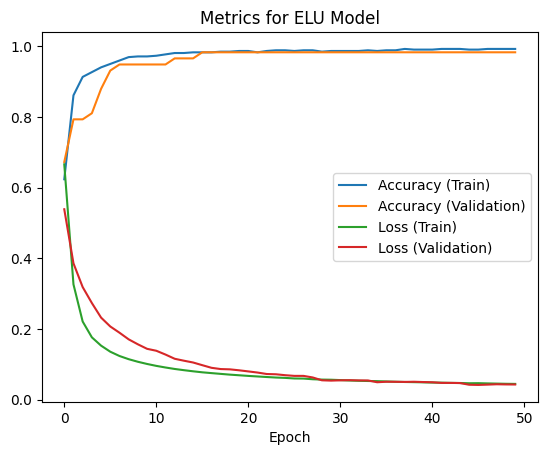

In [194]:
def plot_metrics(history, model_name):
    plt.plot(history.history['accuracy'], label='Accuracy (Train)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
    plt.plot(history.history['loss'], label='Loss (Train)')
    plt.plot(history.history['val_loss'], label='Loss (Validation)')
    plt.title(f'Metrics for {model_name}')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_metrics(history_tanh, "Tanh Model")
plot_metrics(history_LReLU, "LeakyReLU Model")
plot_metrics(history_ELU, "ELU Model")

<div align="center">
  <img src="5.png">
</div>

In [195]:
# Define a function to get predictions of each model

def get_predictions(model, X):
    predictions = np.argmax(model.predict(X), axis=-1)
    return predictions

pred_tanh = get_predictions(tanh_model, X_test_std)
pred_LReLU = get_predictions(LReLU_model, X_test_std)
pred_ELU = get_predictions(ELU_model, X_test_std)

4/4 [==============================] - 0s 2ms/step


#### Accuracy

The accuracy metric measures the proportion of correctly predicted instances out of the total instances in the dataset. In this context, it indicates the percentage of correctly classified samples in the test set by each neural network model.

A higher accuracy suggests that the model is making more correct predictions, while a lower accuracy implies that the model is making more errors.

The Tanh model accuracy is: 92 %
The Leaky ReLU model accuracy is: 94 %
The ELU model accuracy is: 92 %


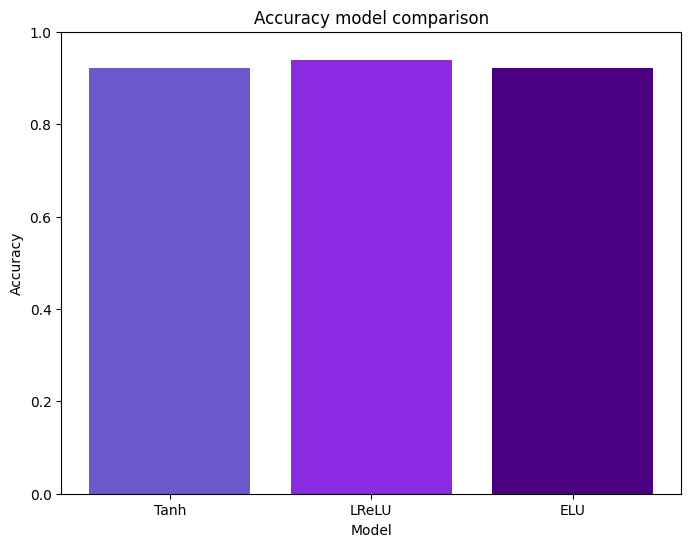

In [196]:
# Define a function to get accuracy
def get_accuracy(model, predictions):
    accuracies = accuracy_score(Y_test, predictions)
    return accuracies

accuracy_tanh = get_accuracy(tanh_model, pred_tanh)
accuracy_LReLU = get_accuracy(LReLU_model, pred_LReLU)
accuracy_ELU = get_accuracy(ELU_model, pred_ELU)

model_names = ['Tanh', 'LReLU', 'ELU']
accuracies = [accuracy_tanh, accuracy_LReLU, accuracy_ELU]

print('The Tanh model accuracy is:', round(accuracy_tanh*100),'%')
print('The Leaky ReLU model accuracy is:', round(accuracy_LReLU*100),'%')
print('The ELU model accuracy is:', round(accuracy_ELU*100),'%')

# Create the accuracy bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['slateblue', 'blueviolet', 'indigo'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy model comparison')
plt.ylim(0, 1)
plt.show()

The Leaky ReLU model stands out with the highest accuracy score of 94%, indicating its superior performance in correctly classifying instances compared to the other models. This suggests that the Leaky ReLU activation function might be more effective in capturing the underlying patterns in the data, leading to better predictive performance.

#### Precision

Precision is a metric that measures the proportion of true positive predictions out of all positive predictions made by the model. It provides insight into the model's ability to avoid false positives, which are instances incorrectly classified as positive.

In the context of this classification problem, precision represents the percentage of correctly predicted positive samples (malignant tumors) out of all samples predicted as positive by each neural network model.

Tanh precision: 93 %
Leaky ReLU precision: 94 %
ELU precision: 93 %


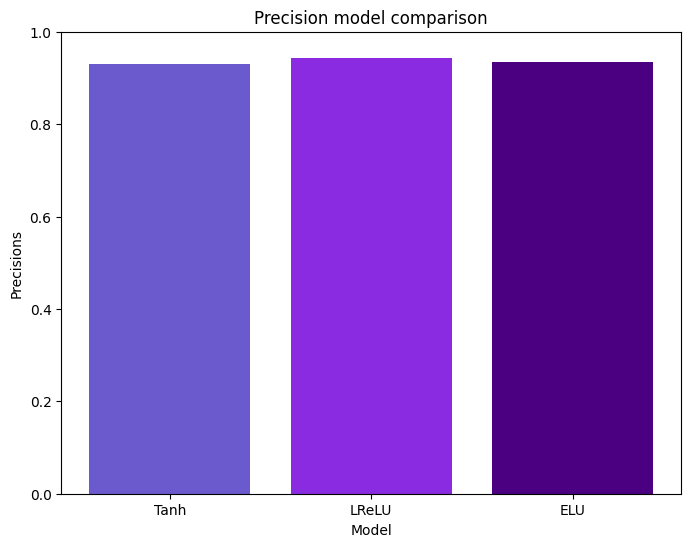

In [197]:
# Define a function to get precisions
def get_precision(model, predictions):
    precisions = precision_score(Y_test, predictions, average='weighted')
    return precisions

# Get precision for each model
precision_tanh = get_precision(tanh_model, pred_tanh)
precision_LReLU = get_precision(LReLU_model, pred_LReLU)
precision_ELU = get_precision(ELU_model, pred_ELU)


precisions = [precision_tanh, precision_LReLU, precision_ELU] 

print('Tanh precision:', round(precision_tanh*100),'%')
print('Leaky ReLU precision:', round(precision_LReLU*100),'%')
print('ELU precision:', round(precision_ELU*100),'%')

# Create the precision bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, precisions, color=['slateblue', 'blueviolet', 'indigo'])
plt.xlabel('Model')
plt.ylabel('Precisions')
plt.title('Precision model comparison')
plt.ylim(0, 1)
plt.show()

Similar to the accuracy comparison, the Leaky ReLU model exhibits the highest precision score of 94%, indicating its ability to make fewer false positive predictions compared to the other models. This suggests that the Leaky ReLU activation function may provide better control over false positives, making it a favorable choice when precision is a critical factor in model evaluation. 

#### ROC-AUC

The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score measures the ability of a model to distinguish between classes, with higher values indicating better performance.

ROC-AUC Tanh: 0.9309178743961353
ROC-AUC Leaky ReLU: 0.9454106280193236
ROC-AUC ELU: 0.9347826086956521


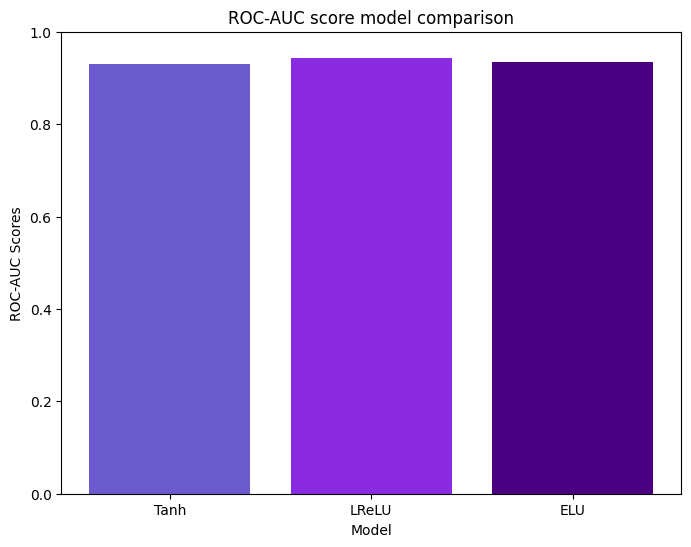

In [198]:
def get_roc_auc (predictions):

    score = roc_auc_score(Y_test, predictions)
    return score

score_tanh = get_roc_auc(pred_tanh)
score_LReLU = get_roc_auc(pred_LReLU)
score_ELU = get_roc_auc(pred_ELU)

print("ROC-AUC Tanh:", score_tanh)
print("ROC-AUC Leaky ReLU:", score_LReLU)
print("ROC-AUC ELU:", score_ELU)

scores = [score_tanh, score_LReLU, score_ELU]


# Create the precision bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, precisions, color=['slateblue', 'blueviolet', 'indigo'])
plt.xlabel('Model')
plt.ylabel('ROC-AUC Scores')
plt.title('ROC-AUC score model comparison')
plt.ylim(0, 1)
plt.show()

In this comparison, the Leaky ReLU model demonstrates the highest ROC-AUC score of 0.945, suggesting that it has the best ability to differentiate between positive and negative samples.

#### Recall

The recall metric, also known as sensitivity or true positive rate, measures the proportion of actual positive cases that were correctly identified by the model. It is calculated as the ratio of true positives to the sum of true positives and false negatives.

Recall Tanh: 0.8840579710144928
Recall Leaky ReLU: 0.9130434782608695
Recall ELU: 0.8695652173913043


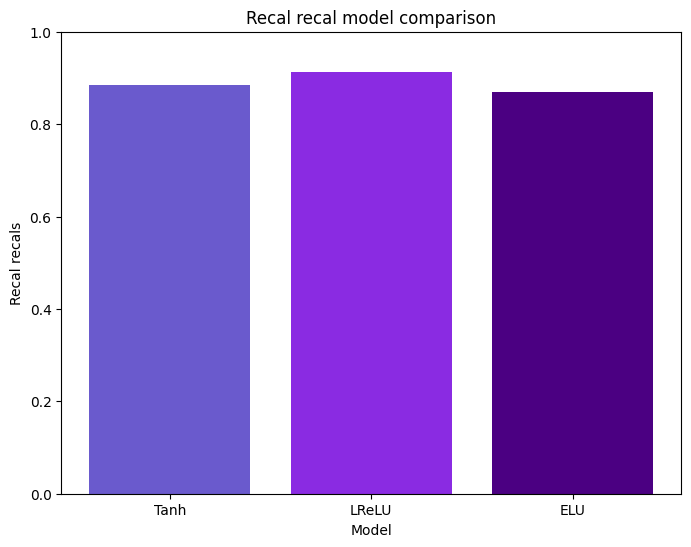

In [199]:
def get_recall (model_prediction):

    recall = recall_score(Y_test, model_prediction)
    return recall

recall_tanh = get_recall(pred_tanh)
recall_LReLU = get_recall(pred_LReLU)
recall_ELU = get_recall(pred_ELU)

print("Recall Tanh:", recall_tanh)
print("Recall Leaky ReLU:", recall_LReLU)
print("Recall ELU:", recall_ELU)

recall_scores = [recall_tanh, recall_LReLU, recall_ELU]


# Create the precision bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, recall_scores , color=['slateblue', 'blueviolet', 'indigo'])
plt.xlabel('Model')
plt.ylabel('Recal recals')
plt.title('Recal recal model comparison')
plt.ylim(0, 1)
plt.show()

In this comparison, the Leaky ReLU model demonstrates the highest recall score of 0.913, indicating that it correctly identifies a higher proportion of positive cases compared to the other models.

<div align="center">
  <img src="6.png">
</div>

After comparing the performance metrics of the three models, it is evident that the Leaky ReLU model outperforms the Tanh and ELU models across multiple evaluation criteria.

Firstly, in terms of accuracy, the Leaky ReLU model achieves the highest accuracy score of 94%, indicating its superior ability to correctly classify instances compared to the Tanh and ELU models, which achieve accuracies of 92% both.

Furthermore, when considering precision, which measures the proportion of true positive cases among all positive predictions made by the model, the Leaky ReLU model also achieves the highest precision score of 94%, indicating its reliability in making positive predictions. The Tanh and ELU models achieve precision scores of 93% each.

Additionally, when assessing the area under the receiver operating characteristic curve (ROC-AUC), which indicates the model's ability to distinguish between classes, the Leaky ReLU model again demonstrates superiority with a score of 0.95. This suggests that the Leaky ReLU model achieves better trade-offs between true positive rate and false positive rate compared to the Tanh and ELU models, which have ROC-AUC scores of 0.93 and 0.93, respectively.

Lastly, considering recall, which measures the proportion of actual positive cases correctly identified by the model, the Leaky ReLU model achieves the highest recall score of 0.91, indicating its sensitivity in detecting positive cases. The Tanh and ELU models achieve recall scores of 0.88 and 0.87, respectively.

In conclusion, based on the superior performance across multiple evaluation metrics, including accuracy, precision, ROC-AUC, and recall, the Leaky ReLU model emerges as the best choice among the three models for the given task.

### Possible Model Failures

* Overfitting:
  
  High accuracy, precision, and recall on the training set do not guarantee similar performance on unseen data. If a model is overly complex or trained for too many epochs, it might memorize noise in the training data, leading to overfitting and poor generalization to new data.

* Model Complexity: 
  
  While neural networks are powerful for capturing complex relationships in data, they can also be prone to over-parameterization. If the model architecture is too complex relative to the size or nature of the dataset, it might introduce unnecessary complexity, leading to difficulties in training and interpretation.

*  External Factors: 
  
   The performance of these models may also be influenced by external factors not captured in the data, such as changes in medical technology, variations in data collection procedures, or differences in patient demographics across datasets.

### Recomendations

* Model Architecture: 
 
  Consider simplifying the neural network architecture if the dataset size or complexity does not justify a highly complex model. Experiment with different architectures, including shallower networks or reducing the number of neurons or layers.

* Continuous Model Monitoring and Evaluation: 
 
  Regularly assess model performance on validation or holdout datasets and monitor performance metrics over time. Update models as necessary with new data or retrain them periodically to ensure they remain relevant and effective.

* Domain Expertise and Collaboration: 
 
  Collaborate closely with domain experts, such as medical professionals or oncologists, to gain insights into the clinical relevance of features, interpret model predictions, and refine the modeling approach based on domain-specific knowledge.

### Author

Ignacio Zúñiga Navarro